In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import matplotlib.ticker as ticker
from scipy.stats import norm
%matplotlib inline

### Task 1
#### point (a), the Euler approximation algorithm for OU process

In [2]:
def OU(X, Y, theta, sigma, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = -theta *  X * dt + sigma * dW
    dY = -theta *  Y * dt + sigma * dW
    return dX, dY

In [3]:
theta = 5
sigma = 3.5
N = 10000
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]
for i in range(1, N):
    dX, dY = OU(X_ou[i - 1], Y_ou[i - 1], theta, sigma, 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [4]:
def CIR(X, Y, theta1, theta2, theta3, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW
    return dX, dY

In [5]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]
for i in range(1, N):
    dX, dY = CIR(X_cir[i - 1], Y_cir[i - 1], theta1, theta2, theta3, 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [6]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = theta1 * X * dt + theta2 * X * dW
    dY = theta1 * Y * dt + theta2 * Y * dW
    return dX, dY

In [7]:
theta1 = 1
theta2 = 0.1
N = 10000
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]
for i in range(1, N):
    dX, dY = BSM(X_bsm[i - 1], Y_bsm[i - 1], theta1, theta2, 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

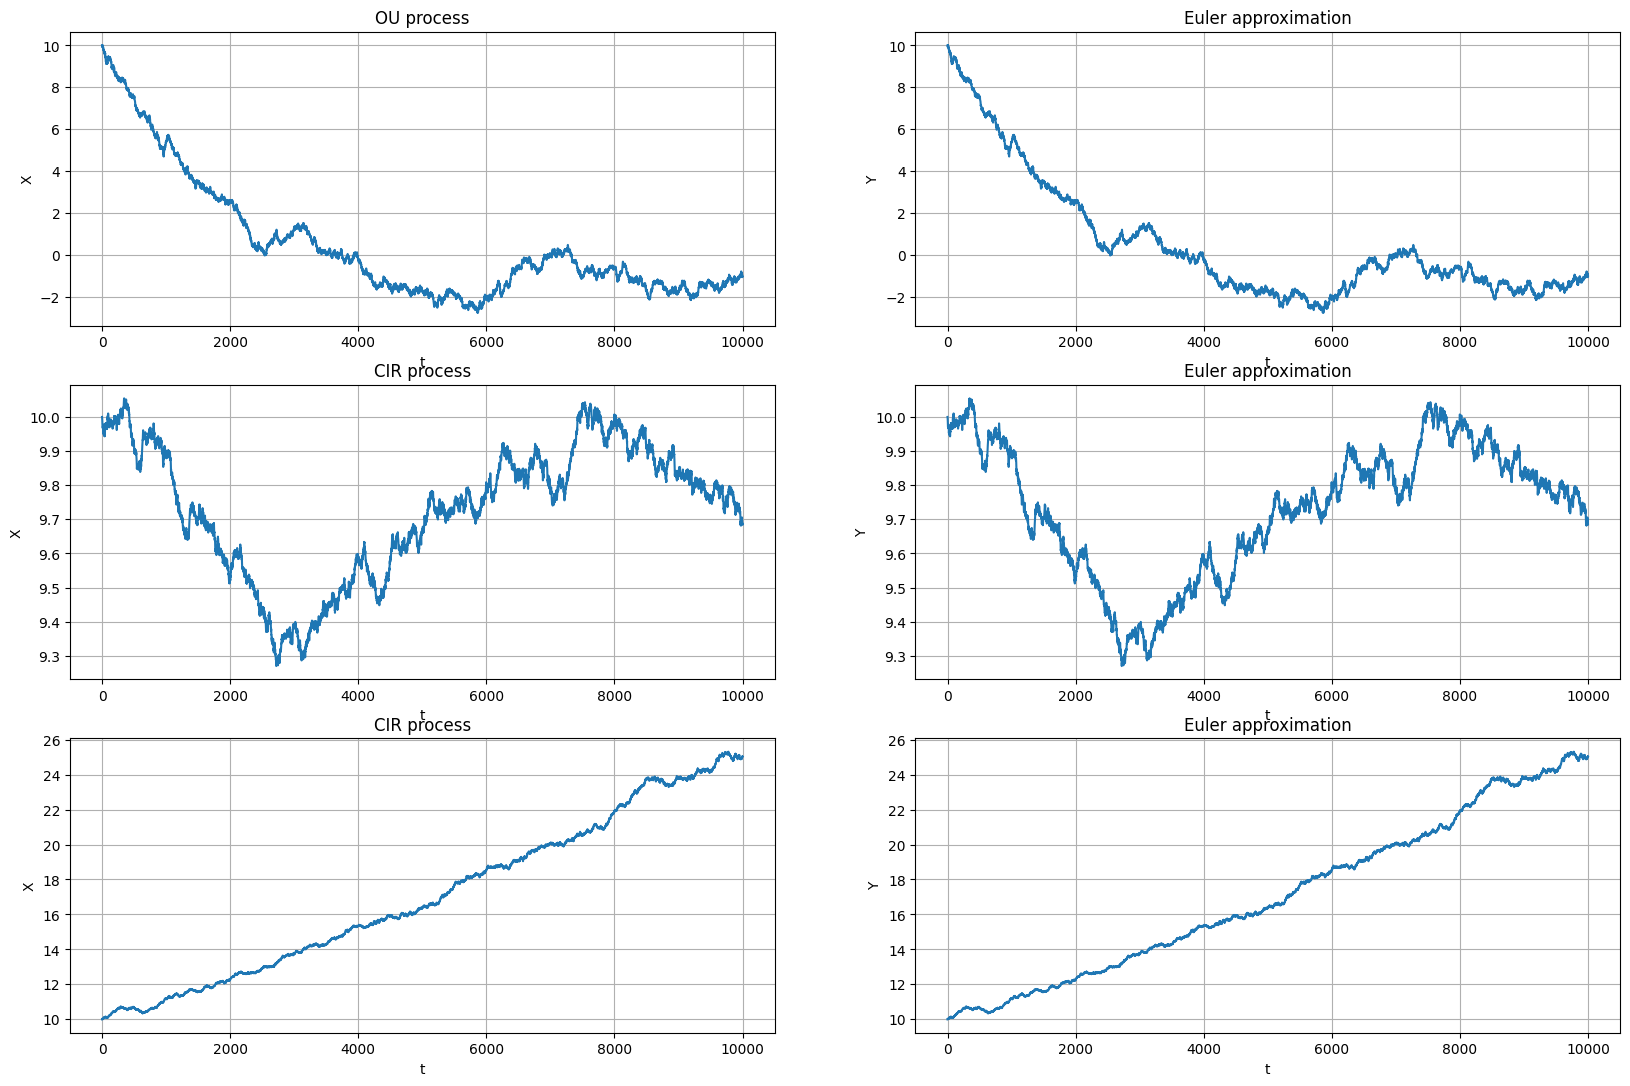

In [8]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Euler approximation')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Euler approximation')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('CIR process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Euler approximation')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### point(b), first Milstein schemes

In [9]:
def OU(X, Y, theta, sigma, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = -theta *  X * dt + sigma * dW
    dY = -theta *  Y * dt + sigma * dW
    return dX, dY

In [10]:
theta = 5
sigma = 3.5
N = 10000
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]
for i in range(1, N):
    dX, dY = OU(X_ou[i - 1], Y_ou[i - 1], theta, sigma, 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [11]:
def CIR(X, Y, theta1, theta2, theta3, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW + (0.25 * theta3 ** 2 / 2)  * (dW ** 2 - dt)
    return dX, dY

In [12]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]
for i in range(1, N):
    dX, dY = CIR(X_cir[i - 1], Y_cir[i - 1], theta1, theta2, theta3, 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [13]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = theta1 * X * dt + theta2 * X * dW
    dY = theta1 * Y * dt + theta2 * Y * dW + 0.5 * theta2 * Y * (dW ** 2 - dt)
    return dX, dY

Text(0, 0.5, 'Y')

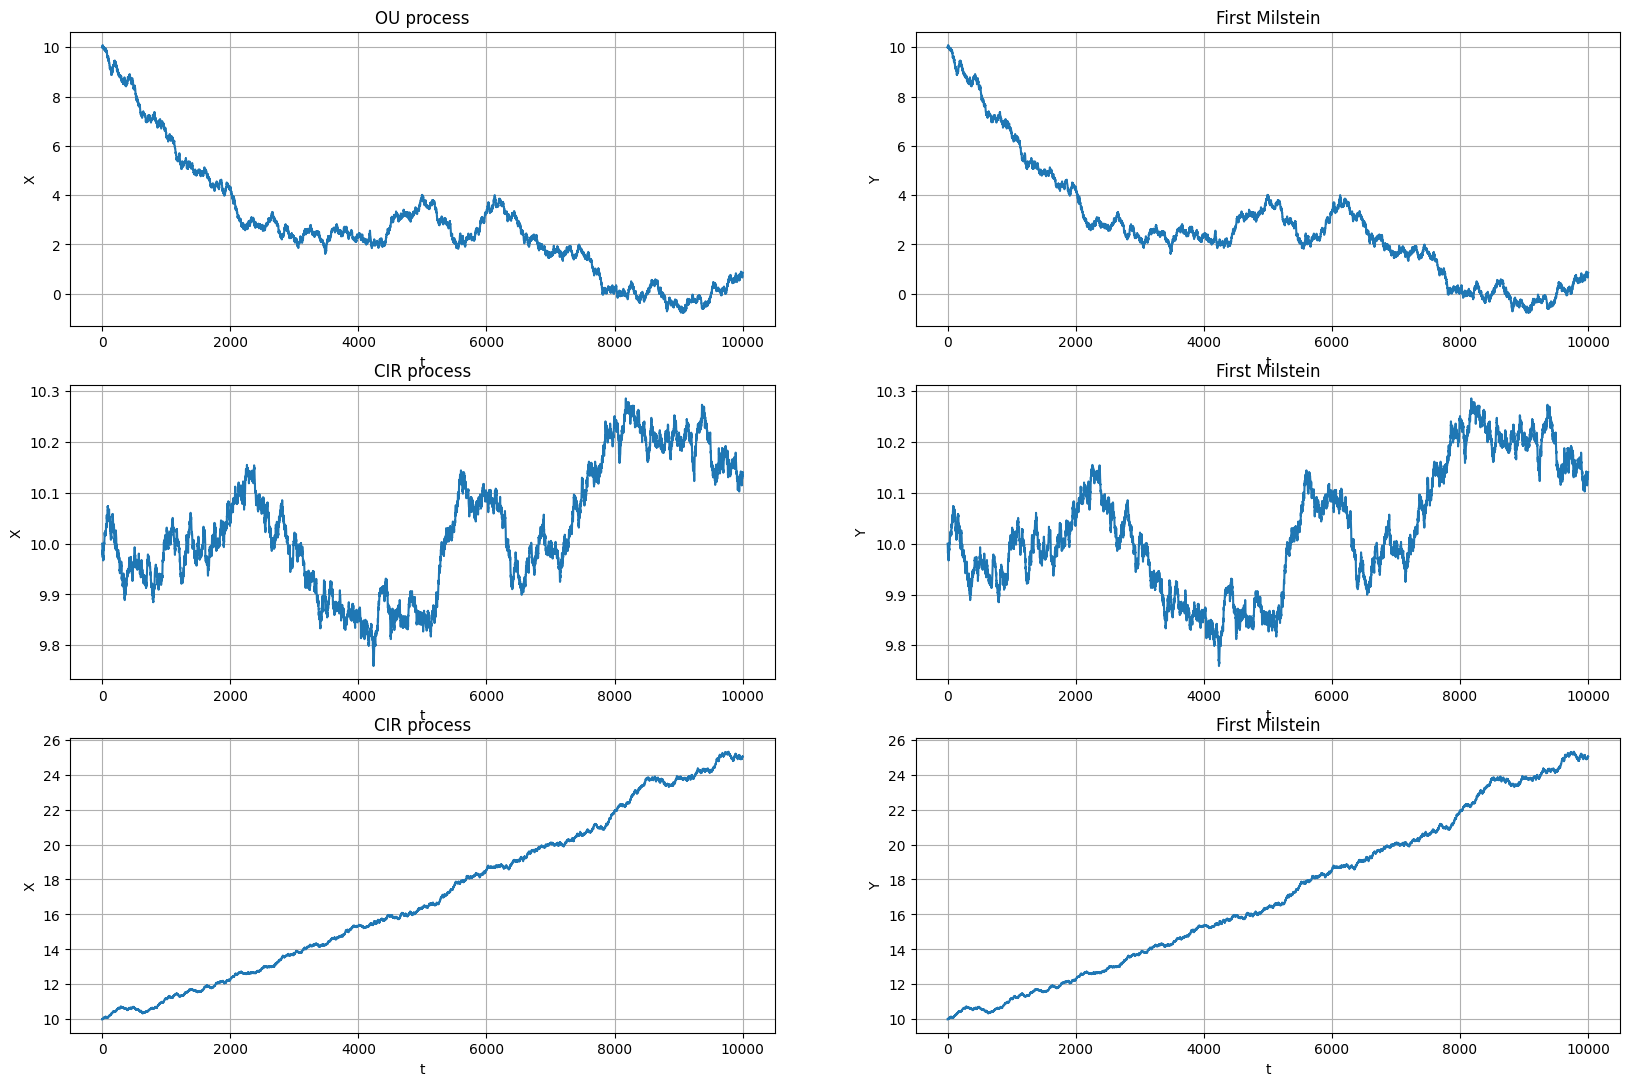

In [14]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('First Milstein')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('First Milstein')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('CIR process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('First Milstein')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### point(b), second Milstein schemes

In [15]:
def second_milstein_schemes(Y, b, sigma, b_x, sigma_x, b_xx, sigma_xx, dW, dt):
    dY = ((b - 0.5 * sigma * sigma_x) * dt + sigma * dW + 0.5 * sigma * sigma_x * (dW ** 2) 
            + (dt ** 1.5) * (0.5 * b * sigma_x + 0.5 * b_x * sigma + 0.25 * sigma ** 2 * sigma_xx) * (dW / np.sqrt(dt))
            + (dt ** 2) * (0.5 * b * b_x + 0.25 * b_xx * (sigma ** 2)))
    return dY

In [16]:
def OU(X, theta1, theta2, dW, dt):
    dX = -theta1 * X * dt + theta2 * dW
    return dX

In [17]:
theta1 = 5
theta2 = 3.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = second_milstein_schemes(Y_ou[i - 1], -theta1 * Y_ou[i - 1], theta2, -theta1, 0, 0, 0, dW[i],1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [18]:
def CIR(X, theta1, theta2, theta3, dW, dt):
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    return dX

In [19]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = second_milstein_schemes(Y_cir[i - 1], theta1 - theta2 * Y_cir[i - 1], theta3 * np.sqrt(Y_cir[i - 1]),
                                 -theta2, theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), 0, -0.25 * theta3 / (Y_cir[i - 1] ** 1.5), dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [20]:
def BSM(X, theta1, theta2, dW, dt):
    dX = theta1 * X * dt + theta2 * X * dW
    return dX

In [21]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = second_milstein_schemes(Y_bsm[i - 1], theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta1, theta2, 0, 0, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

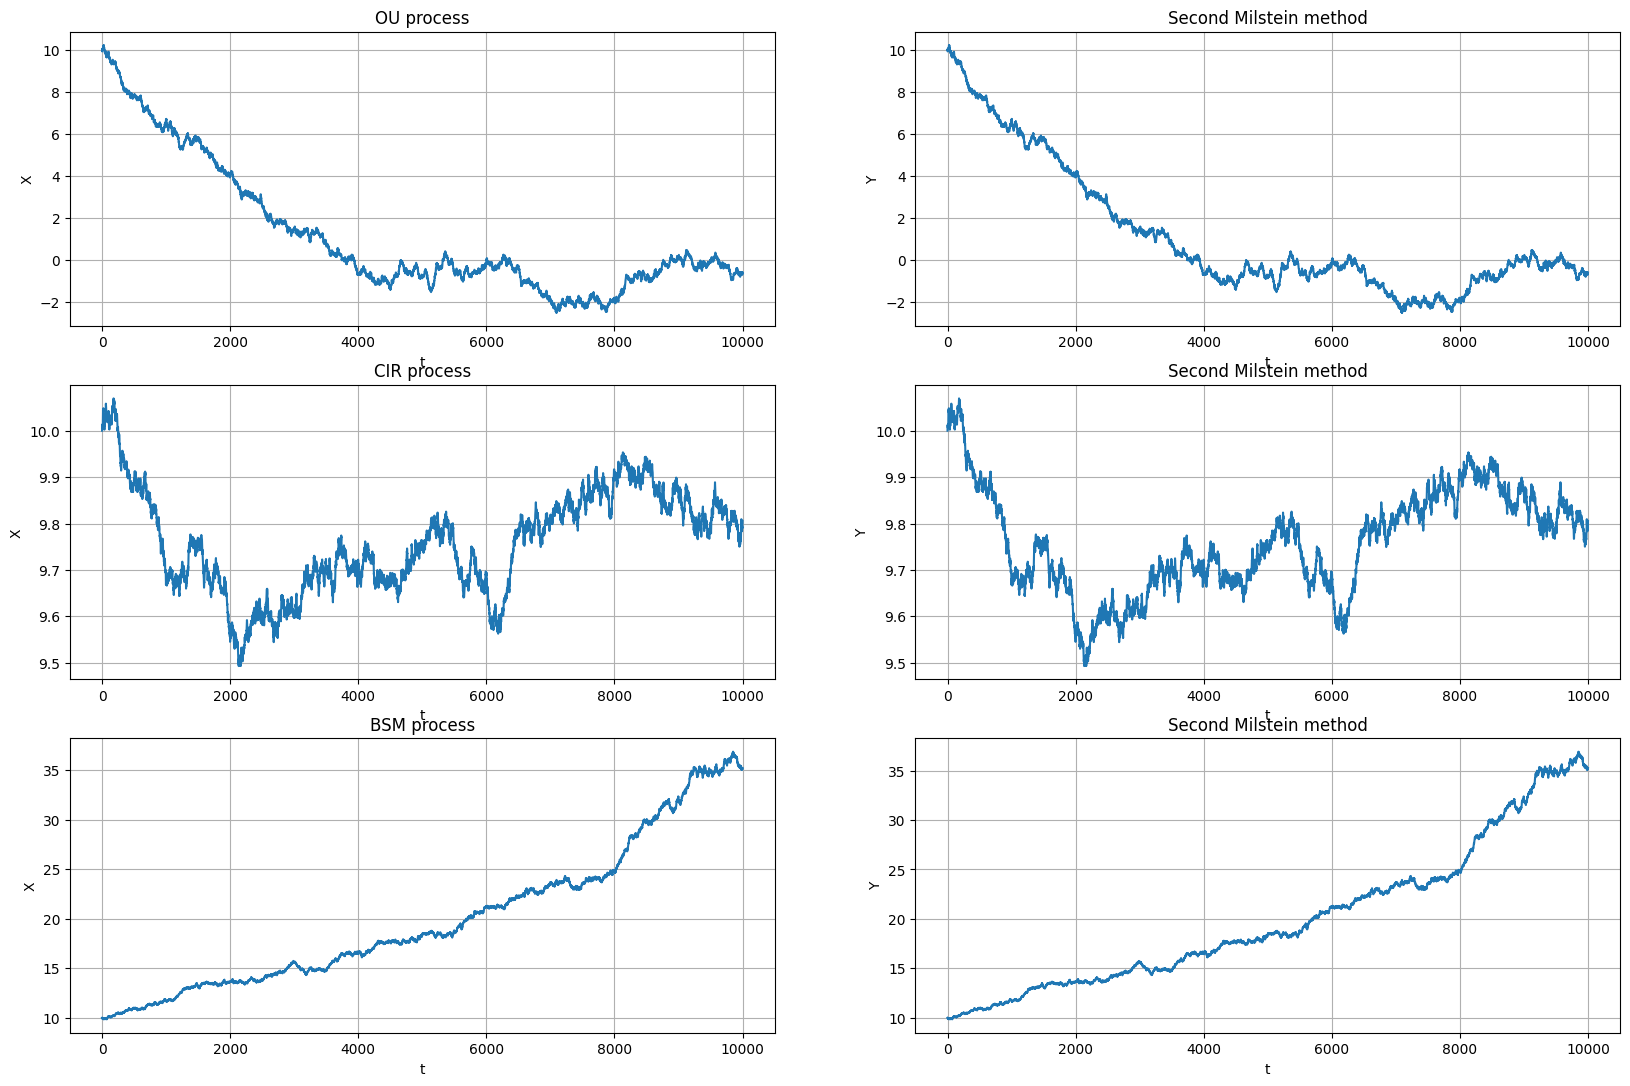

In [22]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Second Milstein method')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Second Milstein method')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Second Milstein method')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### point (c) predictor-corrector method

In [23]:
def predictor_corrector(Y, alpha, etha, b, sigma, sigma_x, dW, dt):
    Y_wave = Y + b * dt + sigma * dW
    b_wave = b - etha * sigma * sigma_x
    dY = (alpha * b_wave + (1 - alpha) * b_wave) * dt + (etha * sigma + (1 - etha) * sigma) * dW
    return dY

In [24]:
theta1 = 5
theta2 = 3.5
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = predictor_corrector(Y_ou[i - 1], alpha, etha, -theta1 * Y_ou[i - 1], theta2, 0, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [25]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = predictor_corrector(Y_cir[i - 1], alpha, etha, (theta1 - theta2 * Y_cir[i - 1]), theta3 * np.sqrt(Y_cir[i - 1]), 
                            theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [26]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = predictor_corrector(Y_bsm[i - 1], alpha, etha, theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta2, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

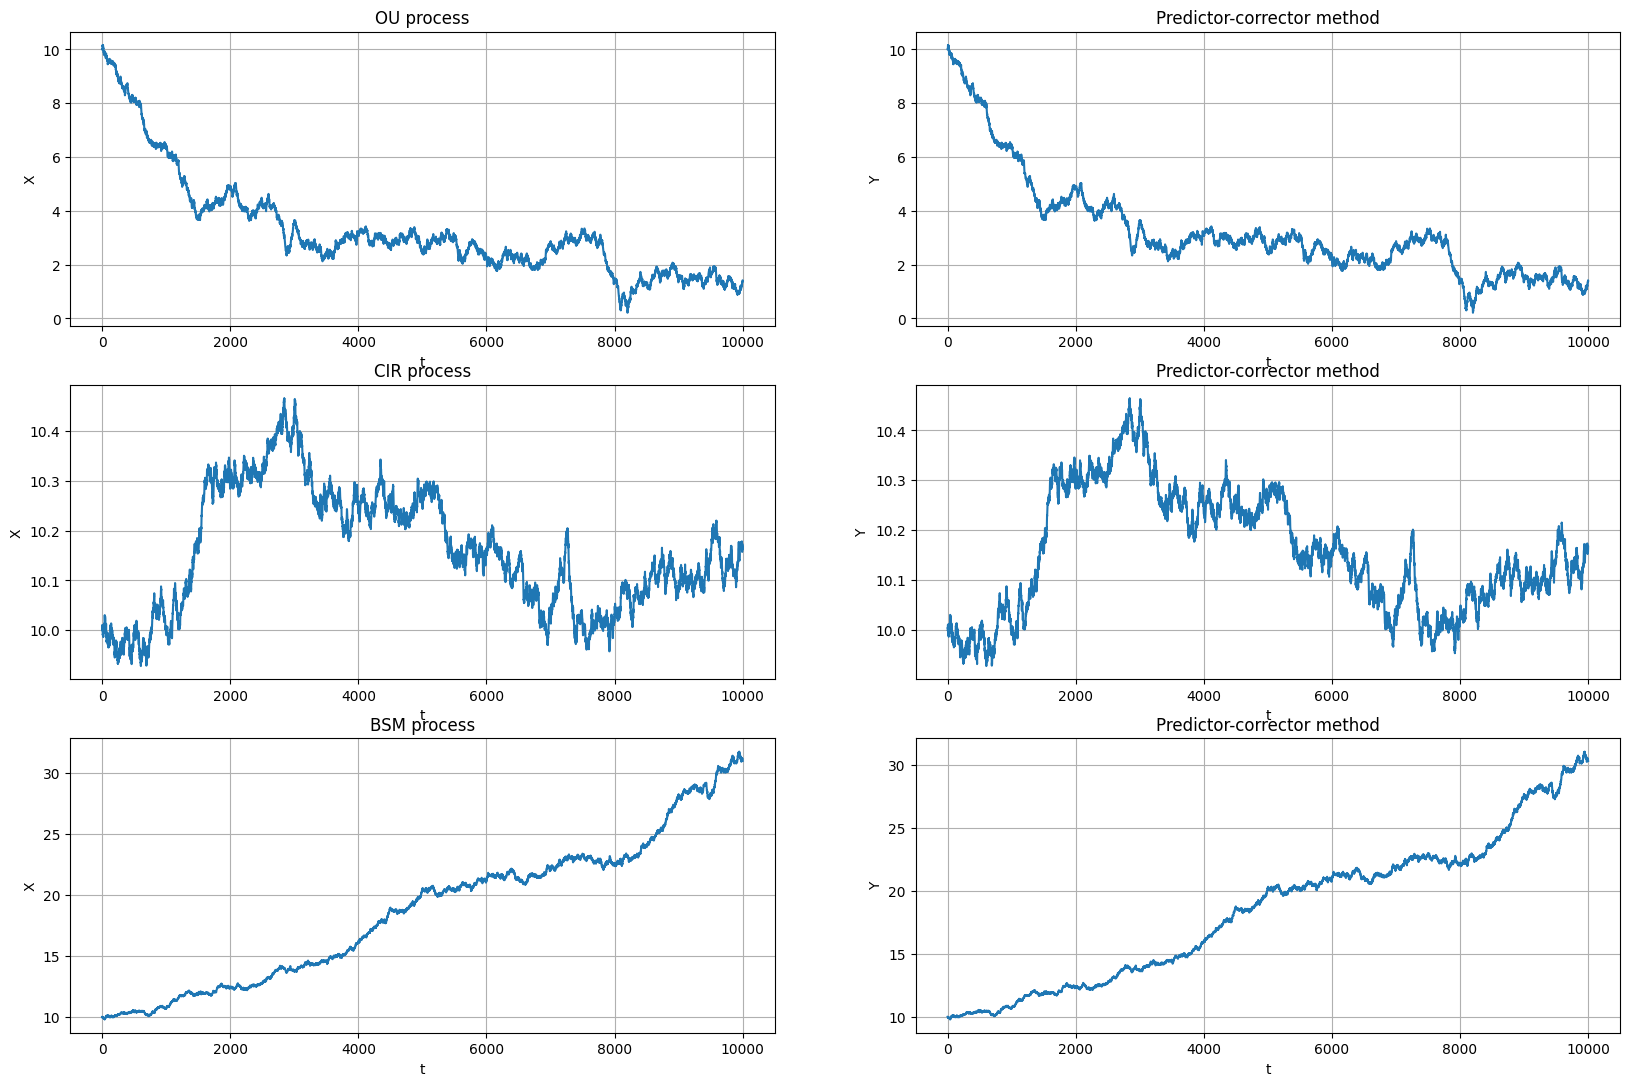

In [27]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Predictor-corrector method')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Predictor-corrector method')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Predictor-corrector method')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### Kloden-Platen-Schurz-Sorensen method

In [30]:
def KPSS(Y, b, sigma, b_x, sigma_x, b_xx, sigma_xx, sigma_sigma_x_x, dW, dt):
    dU = np.random.normal(0, (1 / 3) * (dt) ** 3)
    dY = (b * dt + sigma * dW + 0.5 * sigma * sigma_x * (dW ** 2 - dt)
        + sigma * b_x * dU + 0.5 * (b * b_x + 0.5 * sigma ** 2 * b_xx) * dt ** 2
        + (b * sigma_x + 0.5 * sigma ** 2 * sigma_xx) * (dW * dt - dU)
        + 0.5 * sigma * sigma_sigma_x_x * ((1 / 3) - dW ** 2 - dt) * dW)
    return dY

In [31]:
theta1 = 5
theta2 = 3.5
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = KPSS(Y_ou[i - 1], -theta1 * Y_ou[i - 1], theta2, -theta1, 0, 0, 0, 0, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [34]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = KPSS(Y_cir[i - 1], theta1 - theta2 * Y_cir[i - 1], theta3 * np.sqrt(Y_cir[i - 1]),
                                 -theta2, theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), 0, -0.25 * theta3 / (Y_cir[i - 1] ** 1.5), 0, dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [39]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = KPSS(Y_bsm[i - 1], theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta1, theta2, 0, 0, theta2 ** 2, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

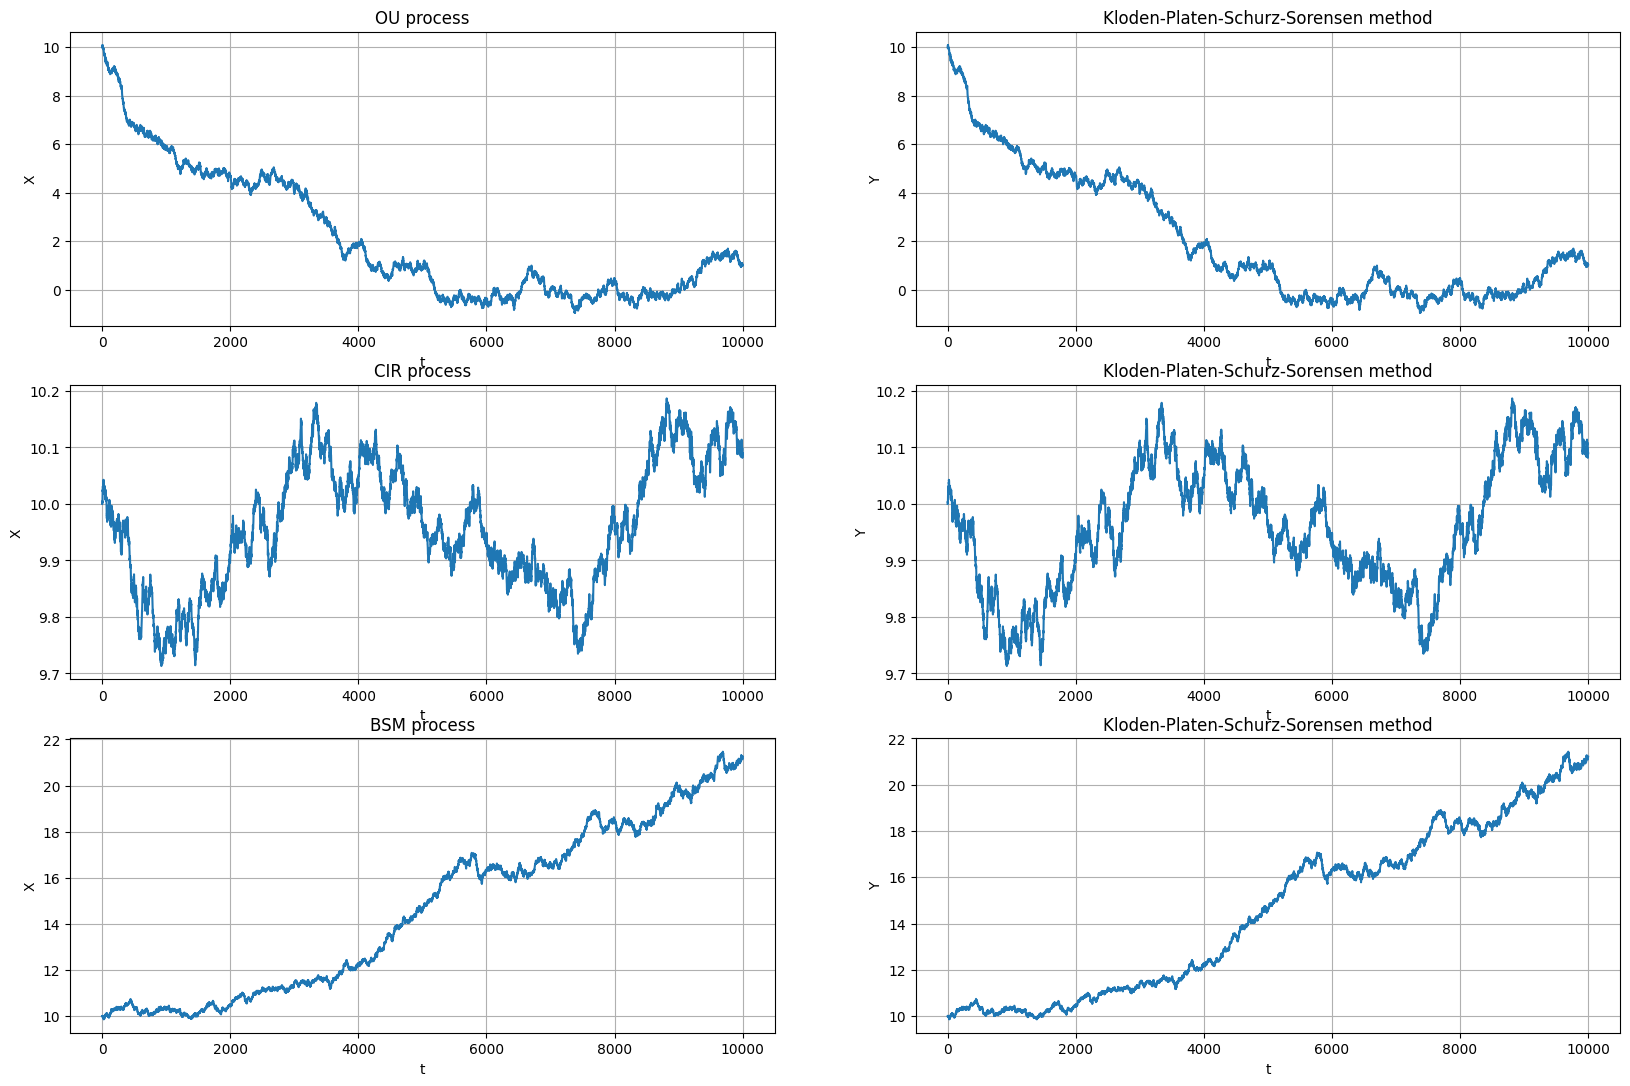

In [42]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Kloden-Platen-Schurz-Sorensen method')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Kloden-Platen-Schurz-Sorensen method')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Kloden-Platen-Schurz-Sorensen method')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')